In [125]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC


df = pd.read_csv('Credit_card.csv')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [126]:
object_columns = ["GENDER", "Car_Owner", "Propert_Owner", "EDUCATION", "Marital_status",
                  "Housing_type", "Type_Occupation"]

#NEW
# Converts all data in the object columns into string type 
for col in object_columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

impute = SimpleImputer(strategy="median")
df[['Annual_income','Birthday_count']] = impute.fit_transform(df[['Annual_income','Birthday_count']])

label_encode = LabelEncoder()
df['Type_Income']=label_encode.fit_transform(df['Type_Income'])

#NEW
# Removes NAN values and replaces with mean for all
def na_values_clean(df):
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            df[col].fillna(df[col].mean(),inplace=True)
        else:
            df[col].fillna('Unavailable',inplace=True)

encode = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encode.fit_transform(df[object_columns])

df_encoded = pd.DataFrame(encoded_data, columns=encode.get_feature_names_out(object_columns))
df_new = pd.concat([df.drop(object_columns, axis=1), df_encoded], axis=1)

df.columns = df.columns.str.lower()
df_new.columns






df.head()

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,phone,email_id,type_occupation,family_members
0,5008827,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,18,2
1,5009744,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,18,2
2,5009746,0,1,0,0,315000.0,0,1,1,1,-15661.5,-586,1,1,1,0,18,2
3,5009749,0,1,0,0,166500.0,0,1,1,1,-13557.0,-586,1,1,1,0,18,2
4,5009752,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,18,2


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ind_id           1548 non-null   int64  
 1   gender           1548 non-null   int64  
 2   car_owner        1548 non-null   int64  
 3   propert_owner    1548 non-null   int64  
 4   children         1548 non-null   int64  
 5   annual_income    1548 non-null   float64
 6   type_income      1548 non-null   int64  
 7   education        1548 non-null   int64  
 8   marital_status   1548 non-null   int64  
 9   housing_type     1548 non-null   int64  
 10  birthday_count   1548 non-null   float64
 11  employed_days    1548 non-null   int64  
 12  mobile_phone     1548 non-null   int64  
 13  work_phone       1548 non-null   int64  
 14  phone            1548 non-null   int64  
 15  email_id         1548 non-null   int64  
 16  type_occupation  1548 non-null   int64  
 17  family_members

In [128]:
print(df_new.columns)

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Type_Income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'GENDER_1', 'GENDER_2', 'Car_Owner_1',
       'Propert_Owner_1', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3',
       'EDUCATION_4', 'Marital_status_1', 'Marital_status_2',
       'Marital_status_3', 'Marital_status_4', 'Housing_type_1',
       'Housing_type_2', 'Housing_type_3', 'Housing_type_4', 'Housing_type_5',
       'Type_Occupation_1', 'Type_Occupation_2', 'Type_Occupation_3',
       'Type_Occupation_4', 'Type_Occupation_5', 'Type_Occupation_6',
       'Type_Occupation_7', 'Type_Occupation_8', 'Type_Occupation_9',
       'Type_Occupation_10', 'Type_Occupation_11', 'Type_Occupation_12',
       'Type_Occupation_13', 'Type_Occupation_14', 'Type_Occupation_15',
       'Type_Occupation_16', 'Type_Occupation_17', 'Type_Occupation_18'],
      dtype='object')


In [129]:
X = df_new.drop(columns=['Car_Owner_1'])
y = df_new['Car_Owner_1']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [130]:
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]

In [131]:
minority_class_ovsp = minority_class.sample(len(majority_class), replace=True, random_state=42)
X_train_spd = pd.concat([majority_class, minority_class_ovsp])
y_train_spd = pd.concat([y_train[y_train == 0], y_train[y_train == 1].sample(len(majority_class),
                                                                             replace=True, random_state = 42)])

y_train_spd.value_counts()

Car_Owner_1
0.0    750
1.0    750
Name: count, dtype: int64

I decided to use oversampling in the Car_Owner row to balance the classes and create new examples, so I could later compare them with other, non-categorical rows. The results of KNN and Logistic Regression were more accurate after oversampling

KNN

In [132]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(df_new.drop('Car_Owner_1', axis=1))
y_knn = df_new['Car_Owner_1']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaler, y_knn, test_size=0.2, random_state=42)

In [133]:
def optimal_k (X_train, y_train, X_test, y_test):
    b_k = 1
    b_score = float('inf')
    for k in range (1, 21):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        score = mean_absolute_error(y_test, y_pred_knn)
        if score < b_score:
            b_score = score
            b_k = k
    return b_k, b_score

b_k, b_mae = optimal_k(X_train_knn, y_train_knn, X_test_knn, y_test_knn)

knn_model = KNeighborsRegressor(n_neighbors=b_k)
knn_model.fit(X_train_knn, y_train_knn)
y_pred_knn = knn_model.predict(X_test_knn)
knn_mae = mean_absolute_error(y_test_knn, y_pred_knn)

b_k, knn_mae

(1, np.float64(0.32903225806451614))

In [134]:
b_k_norm, b_mae = optimal_k(X_train_normalized, y_train_normalized, X_test_normalized, y_test_normalized)

b_k_norm, b_mae 

(1, np.float64(0.32903225806451614))

LOGISTIC REGRESSION

In [135]:
X_log_reg = df_new.drop(['Annual_income','Car_Owner_1'], axis=1)
y_log_reg = df_new['Car_Owner_1']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log_reg, y_log_reg, test_size=0.2, random_state=42)

logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_log, y_train_log)

y_pred_log = logistic_reg.predict(X_test_log)
logistic_accuracy = accuracy_score(y_test_log, y_pred_log)

logistic_accuracy

0.6967741935483871

ROC Curve

Text(0, 0.5, 'TPR')

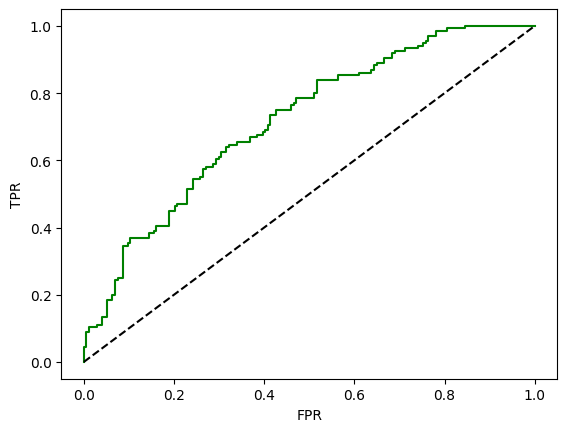

In [139]:
model= LogisticRegression()
model.fit(X_train, y_train)

y_probability = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_probability)

plt.figure()
plt.plot(fpr, tpr, color='green', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [142]:
# AUC Score
auc = roc_auc_score(y_test, y_probability)

print(f"AUC: {auc}")

AUC: 0.717292089249493


In [145]:
classifier = SVC(kernel='linear', probability=True, random_state=42)
classifier.fit(X_train, y_train)
model_prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, model_prediction)

print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.6645161290322581


The SVM model did not perform as well, and it had a 66% of accuracy, 
which is worse than the logistic regression (69%) and the Area Under the Curve (71%).

Outlier Detection is a technique that identifies data points that differ from the rest within a dataset. It is important to assess outliers to prevent skew when analysing data. Some techniques of Outlier Detection are Z-score, SVM, Clustering and IQR.